In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
data=pd.read_csv(r'C:\Users\rashi\Downloads\DSData-master\DSData-master\loan_prediction.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.shape

(614, 13)

there are 614 rows and 13 columns in this dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there 4 columns of float, 1 column of int type & 8 columns of object type

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there 7 columns which contain null values

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
NULLS=data[data.isnull().any(axis=1)]
NULLS.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


In [11]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [12]:
data.Loan_Status.value_counts().sort_index()

N    192
Y    422
Name: Loan_Status, dtype: int64

422 people are eligible for the loan and 192 people are not eligible for the loan

In [13]:
data['Loan_Status'].replace(['N', 'Y'],[0,1], inplace=True)
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# eda

<AxesSubplot:>

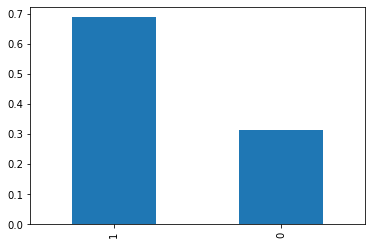

In [16]:
data['Loan_Status'].value_counts(normalize=True).plot.bar()       #univariate analysis

0 shows people not eligible for loan & 1 show people eligible for loan . data shows that more n0. of people are eligible for the loan

<AxesSubplot:>

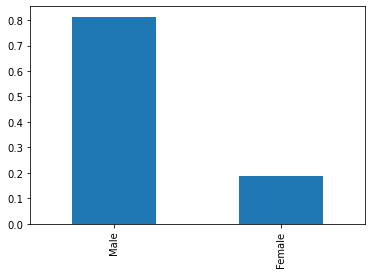

In [17]:
data['Gender'].value_counts(normalize=True).plot.bar()

more males are interested in loan than females

<AxesSubplot:>

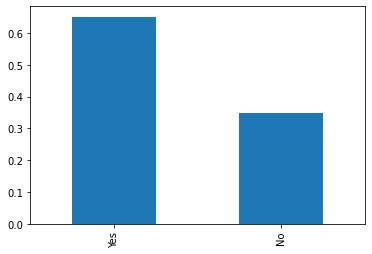

In [18]:
data['Married'].value_counts(normalize=True).plot.bar()

more no. of people are married interested in loan

<AxesSubplot:>

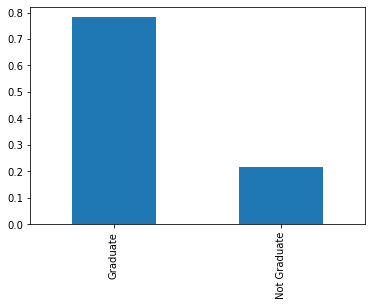

In [20]:
data['Education'].value_counts(normalize=True).plot.bar()

all the people applying for loan are educated

<AxesSubplot:>

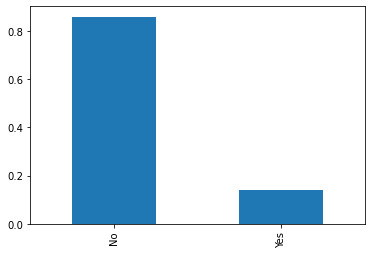

In [22]:
data['Self_Employed'].value_counts(normalize=True).plot.bar()

more no. of people are not self employed

<AxesSubplot:>

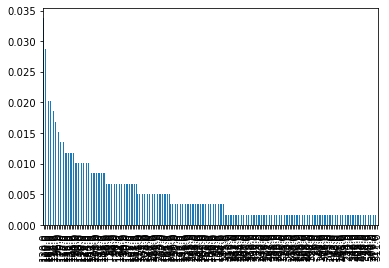

In [23]:
data['LoanAmount'].value_counts(normalize=True).plot.bar()

this data contains many values so we will try something else

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

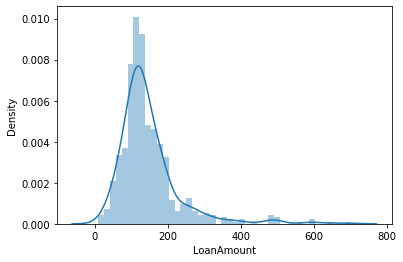

In [24]:
sns.distplot(data['LoanAmount'])

data is equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

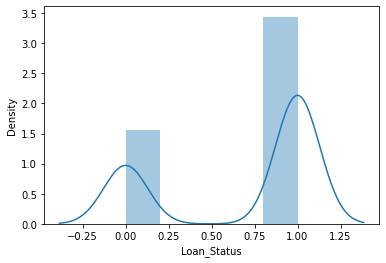

In [25]:
sns.distplot(data['Loan_Status'])

data is not equally distributed

In [29]:
import numpy as np


C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

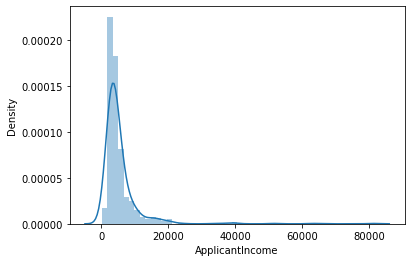

In [34]:
plt.subplot()
sns.distplot(data[('ApplicantIncome')])                         #bivariate analysis



data is equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

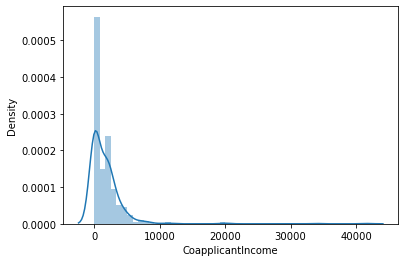

In [35]:
plt.subplot()
sns.distplot(data[('CoapplicantIncome')])

data is almost equally distributed

<AxesSubplot:xlabel='Gender'>

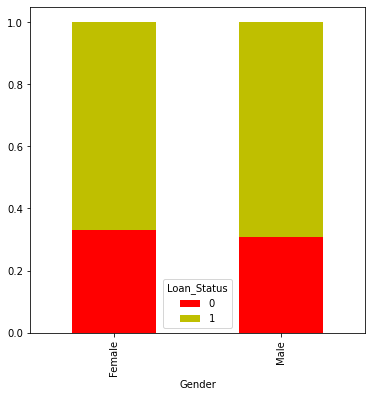

In [36]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','y'])

<AxesSubplot:xlabel='Property_Area'>

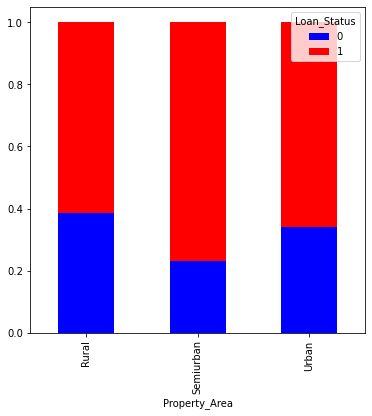

In [38]:
Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 
Area.div(Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['b','r'])

this data shows the Area Type vs Loan Status

<AxesSubplot:xlabel='Credit_History'>

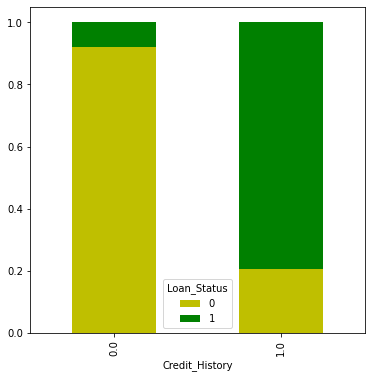

In [39]:
cred=pd.crosstab(data['Credit_History'],data['Loan_Status']) 
cred.div(cred.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['y','g'])

this data shows Credit History vs Loan Status

<AxesSubplot:xlabel='Education'>

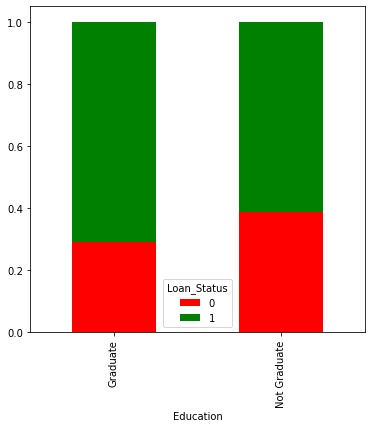

In [40]:
edu=pd.crosstab(data['Education'],data['Loan_Status']) 
edu.div(edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

this data shows  Education vs Loan Status

<AxesSubplot:xlabel='Dependents'>

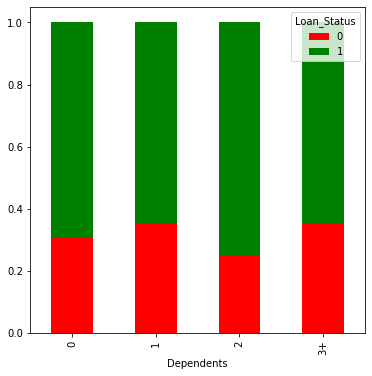

In [42]:
dno=pd.crosstab(data['Dependents'],data['Loan_Status']) 
dno.div(dno.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6),color = ['r','g'])

this data shows No of Dependents vs Loan Status

Although % of Male getting their loan amount sanctioned is marginally higher than their female counterparts, considering the number of males in the dataset from univariate analysis, we can say Gender has very little to do with Loan Staus atleast in this dataset.

Semi-urban area type seems to have higher loan sanction percentage when compared to rural and urban areas.

Graduates fare mariginally better when compared to not graduate.

no of dependents = 2 has the highest loan sanction percentage while 1,3 are the least sanctioned.

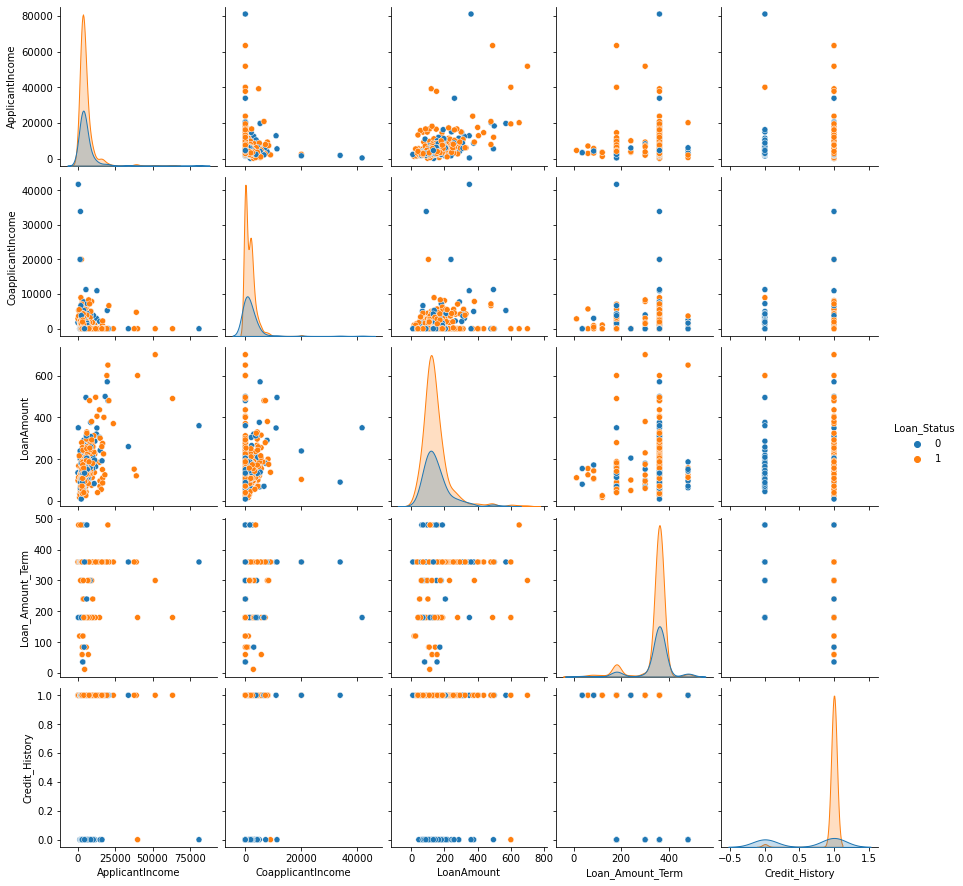

In [43]:
sns.pairplot(data,hue='Loan_Status')             #multivariate analysis 

In [44]:
cor=data.corr()                         #example of multivariate analysis
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


# correlation matrix

In [62]:
d_data = data                       #d_data=d_data.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
d_data['Dependents'].replace('3+', 3,inplace=True) 
d_data['Loan_Status'].replace('N', 0,inplace=True) 
d_data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

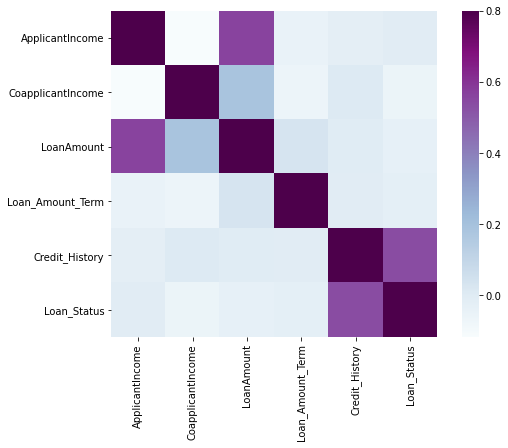

In [63]:
matrix = d_data.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

Credit History and Loan Status are correlated.So is Loan Amount and Loan Status from the matrix.Loan Amount and Co Applicant Income are also relatively correlated.

# data claening

In [64]:
d_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
d_data['Gender'].fillna(d_data['Gender'].mode()[0], inplace=True)        #using mode
d_data['Married'].fillna(d_data['Married'].mode()[0], inplace=True) 
d_data['Dependents'].fillna(d_data['Dependents'].mode()[0], inplace=True) 
d_data['Self_Employed'].fillna(d_data['Self_Employed'].mode()[0], inplace=True) 
d_data['Credit_History'].fillna(d_data['Credit_History'].mode()[0], inplace=True)
d_data['Loan_Amount_Term'].fillna(d_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [66]:
d_data['LoanAmount'].fillna(d_data['LoanAmount'].median(), inplace=True)         #using median

In [67]:
d_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now our data do not have any null values

# outlier treatment

<AxesSubplot:>

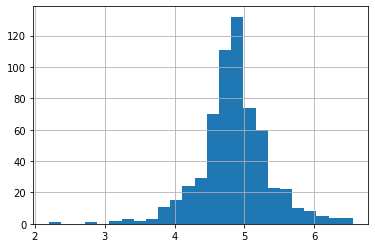

In [89]:
import numpy as np
d_data['LoanAmount_log'] = np.log(d_data['LoanAmount'])
d_data['LoanAmount_log'].hist(bins=25)

we havbe removed the outliers from the data

# skewness

In [90]:
d_data.skew()

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Loan_Status         -0.809998
LoanAmount_log      -0.195355
dtype: float64

In [91]:
data_sqrt = np.sqrt(d_data['ApplicantIncome'])
data_sqrt.skew()

2.9672860248621027

In [92]:
data_sqrt = np.sqrt(d_data['CoapplicantIncome'])
data_sqrt.skew()

0.9795605436152078

In [93]:
data_sqrt = np.sqrt(d_data['LoanAmount'])
data_sqrt.skew()

1.3422693138757835

In [94]:
data_sqrt = np.sqrt(d_data['Credit_History'])
data_sqrt.skew()

-2.0219705924848985

our data is skewed now

# train test

In [130]:
x=d_data.drop('Loan_Status',axis=1)
y=d_data['Loan_Status']

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

encoding

In [132]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d_data['Loan_ID']=LE.fit_transform(d_data['Loan_ID'])

In [133]:
d_data['Loan_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [134]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d_data['Gender']=LE.fit_transform(d_data['Gender'])

In [135]:
d_data['Gender'].unique()

array([1, 0], dtype=int64)

In [136]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d_data['Married']=LE.fit_transform(d_data['Married'])

In [137]:
d_data['Married'].unique()

array([0, 1], dtype=int64)

In [138]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_log     614 non-null    float64
 14  Education          614 non-null    int32  
dtypes: float64(5), int32(4), int64(5), object(1)
memory usage: 62.5+ KB


In [139]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d_data['Education']=LE.fit_transform(d_data['Education'])

In [140]:
d_data['Education'].unique()

array([0, 1], dtype=int64)

In [141]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d_data['Self_Employed']=LE.fit_transform(d_data['Self_Employed'])

In [142]:
d_data['Self_Employed'].unique()

array([0, 1], dtype=int64)

In [143]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d_data['Property_Area']=LE.fit_transform(d_data['Property_Area'])

In [144]:
d_data['Property_Area'].unique()

array([2, 0, 1], dtype=int64)

In [145]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_log     614 non-null    float64
 14  Education          614 non-null    int32  
dtypes: float64(5), int32(1), int64(8), object(1)
memory usage: 69.7+ KB


In [146]:
d_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Education
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030,0
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,0
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,0


In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=1)

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [157]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [161]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 80.00%
[[ 2  5]
 [ 1 22]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.81      0.96      0.88        23

    accuracy                           0.80        30
   macro avg       0.74      0.62      0.64        30
weighted avg       0.78      0.80      0.77        30



we have 80% accuracy in lr

In [147]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=1)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1

print('best accuracy is ',maxAccu,'on Random_state',maxRS)

best accuracy is  0.7333333333333333 on Random_state 1


we have 73% accuracy

In [148]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=1)

In [150]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [151]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.25      0.29      0.27         7
           1       0.77      0.74      0.76        23

    accuracy                           0.63        30
   macro avg       0.51      0.51      0.51        30
weighted avg       0.65      0.63      0.64        30



we got 63% accuracy

In [152]:
SV=SVC()
SV.fit(x_train, y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      1.00      0.87        23

    accuracy                           0.77        30
   macro avg       0.38      0.50      0.43        30
weighted avg       0.59      0.77      0.67        30



C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we got 70% accuracy

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.6937358389977343


In [164]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.6872984139677463


so dtc is my best model because it has least difference

# hyper parameter tuning

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
parameter= {'max_depth': np.arange(2,10),
           'criterion':['gini','entropy']}

In [174]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [175]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [176]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [177]:
final_mod = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
final_mod.fit(x_train, y_train)
pred = final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

80.0


In [178]:
import joblib
joblib.dump(final_mod,'finalmodle.pkl')

['finalmodle.pkl']